# 👊10.인공 신경망 소개

10장에서는 인공신경망의 간단한 아이디어와 발전과정을 살펴볼 예정이다.

인공 신경망(ANN, Aritificial Neural Networks)은 1943년 신경생리학자 Warren McCulloch과 수학자 Walter Pitts가 'A Logical Calculus of Ideas Immanent In Nervous Activity' 처은 소개했으며, 뇌의 생물학적 뉴런이 복잡한 계산을 위해 어떻게 상호작용하는지에 대해 간단한 계산 모델을 제시했다.

1960년대까지는 이렇게 등장한 인공 신경망을 통해 사람들은 지능을 가진 기계와 대화를 나눌 수 있을 것이라고 생각했다. 하지만 아래 그림(출처: beamandrew's blog)처럼 사람들의 기대와는 달리 인공 신경망으로 XOR문제를 해결할 수 없게 되었고, 1990년 대에는 SVM과 성능이 좋은 다른 머신러닝 알고리즘들이 나오게 되면서 인공 신경망은 암흑기로 접어 들게 되었다.


![](./images/history.jpg)



2000년 대에 들어서면서 인공 신경망은 2012년 ILSVRC2012 대회에서 인공 신경망을 깊게 쌓은 딥러닝 모델인 AlexNet이 압도적인 성적으로 우승하면서 다시금 주목받게 되었다. 이렇게 인공 신경망(딥러닝)이 다시 주목받게 된 계기는 다음과 같은 것들이 있다.

- 빅 데이터 시대인 요즘 신경망을 학습시키기 위한 데이터가 엄청나게 많아 졌다.
- 신경망은 다른 머신러닝 알고리즘보다 규모가 크고 복잡한 문제에서 성능이 좋다.
- 1990년대 이후 크게 발전된 컴퓨터 하드웨어 성능과 Matrix연산에 고성능인 GPU로 인해 상대적으로 짧은 시간 안에 대규모의 신경망을 학습시킬 수 있게 되었다.

### 👊10.1.1 생물학적 뉴런

신경망은 생물학적 뉴런을 살펴볼 필요가 있다. 별로 중요하지는 않지만 이는 신경망의 아이디어와 비슷하기 때문이다.

우리의 뇌는 수상돌기에서 데이터를 받아 다음 수상돌기의 Synapse에서 이전 정보를 활성화 유무를 결정한다.

- **Dendrite** : 수상돌기, 다른 뉴런으로부터 신호를 수용하는 부분
- **Axon** : 축삭돌기, 신호를 내보내는 부분
- **Synaptic terminals** : 시냅스(synapse) 뉴런의 접합부, 다른 뉴런으로 부터 짧은 전기 자극 **신호**(signal)를 받음
​
![](./images/neuron.png)


### 👊10.1.3 퍼셉트론
**퍼셉트론**(Perceptron)은 Frank Rosenblatt가 1975년에 제안한 인공 신경망 구조 중 하나이며, 이 퍼셉트론이 바로 신경망(딥러닝)의 기원이 되는 알고리즘이라고 할 수 있다. 퍼셉트론에 대한 자세한 내용은 [여기](http://excelsior-cjh.tistory.com/169?category=940400)서 확인할 수 있다.

퍼셉트론은 **TLU**(Threshold Logic Unit)이라는 형태의 뉴런을 기반으로 하며, 아래의 그림과 같이 입력과 출력이 어떤 숫자고 각각의 입력에 각각 고유한 **가중치**($\mathbf{W}$, weight)가 곱해진다.
$$
z = w_1x_1 + w_2x_2 + \cdots + w_nx_n = \mathbf{W}^{T} \cdot \mathbf{X}
$$
그런 다음 계산된 합 $z$에 **계단 함수**(step function)를 적용하여 결과 $h$를 출력한다.
$$
\begin{align*}
h_w(\mathbf{X}) &= \text{step}(z) \\ &= \text{step}(\mathbf{W}^{T} \cdot \mathbf{X})
\end{align*}
$$

![](./images/perceptron02.png)

가중치의 합까지는 우리가 기존에 배웠던 선형회귀와 동일하다. 하지만 앞서 신경망을 통해 보았던 시냅스 부분인 계단함수가 존재한다. 

계단함수는 가중치 합이 일정치를 넘을 경우 활성화 하며, 그렇지 않으면
비활성화된다. 계단함수를 통해 이진 분류가 가능하다.

이러한 퍼셉트론을 3개로 구성하면 이 퍼셉트론은 샘플 세 개의 클래스(레이블)로 분류할 수 있는 Multioutput Classifier이다.

![](./images/multi-tlu.png)

#### 퍼셉트론의 약점: XOR 문제

1969년 Marvin Minsky와 Seymour Papert는 '퍼셉트론'이란 논문에서 퍼셉트론의 심각한 약점이 있다는 것을 보였는데, 그 중에서도 가장 결정적인 것은 선형결합인 퍼셉트론이 배타적 논리합인 XOR 분류 문제를 해결할 수 없다는 것이었다. 

![or-vs-xor](./images/or-vs-xor.png)
단층으로 퍼셉트론은 선형의 조합과 동일하며 이는 XOR과 같은 간단한 문제를 해결할 수 없었으며,
이에 따라서 SVM과 RANDOMFOREST와 같이 더 간단하면서 강력한 머신러닝 기법들이 주목 받고, ANN에 대한 한계로 발전이 멈추었다.


이를 계기로 인공 신경망은 암흑기를 맞이하게 되었다. 하지만, 단일 퍼셉트론을 여러개 쌓아 **다층 퍼셉트론**(**MLP**, Multi-Layer Perceptron)을 통해 XOR 분류 문제를 해결할 수 있었다. 
아래와 같이 Layer가 1개에서 2개로 늘어났을 때, 더 복잡한 비선형성을 가질 수 있었고 이를 통해 XOR문제를 해결할 수 있었다.
![](./images/xor_gate05.png)

퍼셉트론과 레이어의 수를 늘리는 방법으로 XOR을 해결할 수 있지만,
이를 판단하기 위한 W와 B를 학습하는 방법이 없다고 판단하여, 딥러닝은 불가능하다는
판단이 있었지만, 이를 Back Propagation을 통해 학습할 수 있었다.

#### Vainshing gradient

역전파를 통해 w와 b를 학습할수 있으며, 
다층의 레이어와 퍼셉트론으로 xor과 같이 복잡한 문제를 해결할 수 있다는 것을 
우리는 지금까지 배웠다.
하지만 여기서 새로운 문제점이 발견되었는데 기존까지는 sigmoid를 activation function으로 
사용하였는데, 이에 대해서 layer를 깊게 할 경우
vanishing gradient가 발생하였다.
vanishing gradient는 역전파 과정에서 sigmoid의 미분을 여러번 거치어, 앞쪽에 있는
w가 update가 되지 않고 변하지 않는 것을 의미한다. 
신경망은 많은 layer를 통해 비선형성과 복잡한 문제를 풀 수 있는 것이 강점을 가지는 것인데
빈선형성을 가지는데 한계를 가지므로, 신경망에 대한 관심이 줄어드는 계기였다.
![](./images/vanishing.png)

### 👊10.1.4 다층 퍼셉트론과 역전파

위에서 살펴 봤듯이 다층 퍼셉트론(MLP)은 아래의 그림과 같이 입력층, **은닉층**(hidden layer)이라 부르는 하나 이상의 TLU 층과 마지막으로 **출력층**(output layer)으로 구성된다. 인공 신경망의 은닉층이 2개 이상일 때, **심층 신경망**(**DNN**, Deep Neural Network)라 하고 이를 학습하여 모델을 만드는 것을 우리가 익히 들어온 **딥러닝**(Deep-Learning) 이라고 한다.

![](./images/mlp.png)



이렇게 여러층을 쌓은 MLP를 통해 XOR 문제를 해결 했지만, 층이 깊어질 수록 증가하는 가중치 매개변수의 수로 인해 다층 퍼셉트론을 학습시키기에는 오랜 시간이 걸리는 문제가 발생했다. 하지만, 1986년 **역전파(backpropogation)** 알고리즘이 등장하면서 계산량을 획기적으로 줄일 수 있게 되었다. 역전파법에 대한 자세한 내용은 [여기](http://excelsior-cjh.tistory.com/171)를 참고하면 된다.

역전파법을 간단히 설명 한다면 다음과 같다.

1. 먼저, 각 학습 데이터 샘플을 네트워크에 입력으로 넣어주고 출력층까지 각 층의 뉴런 마다 출력을 계산한다. 이를 **순전파**(forward propagation)이라고 한다. 
2. 그 다음 네트워크의 마지막 출력층에 대한 결과(예측값)와 실제값과의 차이, 즉 오차(error)를 계산하는데, 손실함수(loss function)를 이용하여 계산한다.
3. 그리고 이 오차를 역방향으로 흘러 보내면서, 각 출력 뉴런의 오차에 마지막 입력 뉴런이 얼마나 기여했는지 측정한다. 이말을 쉽게 설명하면, **각 뉴런의 입력값에 대한 손실함수의 편미분, 그래디언트(gradient)을 계산**하는 것을 말한다.
4. 3번과 같은 방법을 입력층에 도달할 때까지 계속 반복해서 역방향으로 흘러 보낸다.
5. 마지막으로, 계산한 그래디언트를 네트워크의 모든 가중치 매개변수에 반영해주는 **경사 하강법 단계**를 수행한다.



따라서, 먼저 순전파를 통해 네트워크가 예측을 출력(출력층의 출력 결과)하고, 이를 손실함수를 이용해 오차를 계산한 뒤, 역방향으로 거슬러 올라가면서 각 뉴런의 입력값에 대한 손실함수의 편미분을 계산하고(backpropagation), 이를 경사 하강법을 이용해 가중치를 조정하는 방법이 역전파 알고리즘이다.

#### 활성화 함수 (activation function)

역전파 알고리즘이 잘 동작하기 위해서 다층 퍼셉트론(MLP)의 구조에 변화를 주었는 데, 그것이 바로 활성화 함수 부분에서 계단 함수를 시그모이드 함수(로지스틱 함수)로 바꿔준 것이다. 이렇게 활성화 함수를 시그모이드 함수로 바꿔준 이유는 가중치 매개변수를 조정 해주기 위해 그래디언트, 편미분을 계산하게 되는데, 계단 함수는 0을 기준으로 기울기가 없는 직선이므로 그래디언트를 계산하는 것이 의미가 없기 때문이다(0을 기준으로 불연속이기 때문에 미분이 불가능한 이유도 있다).  활성화 함수로는 아래의 그림처럼 로지스틱 함수 외에 다양한 활성화 함수를 사용할 수 있다.

![](./images/activation02.png)



위의 그림에서 **ReLU** 또한 0에서 연속이지만 첩점(뾰족한 점)이므로 미분이 불가능하다. 하지만 0보다 큰 경우에는 미분을 적용하고 0 이하인 값에는 0을 줌으로써 해결할 수 있다. 또한, ReLU가 성능이 좋을 뿐만아니라 'cs231n' 강의에서는 실제 생물학적으로 시그모이드 보다 그럴듯한 작용을 한다고 한다.

In [4]:
import os
import numpy as np
import tensorflow as tf

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

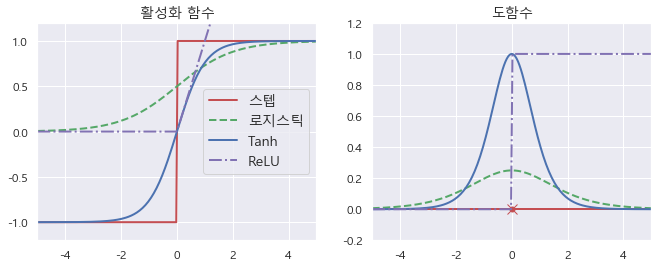

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="스텝")
plt.plot(z, logit(z), "g--", linewidth=2, label="로지스틱")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("활성화 함수", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("도함수", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

기존의 활성화 함수 Sigmoid와 비슷한 Tanh을 보았을때, 도함수가 대부분 0 주위에 분포하는 것을 파악할 수 있다.

이렇듯 기존의 sigmoid는 미분이 0에 근접하였으며, Layer가 여러층이 있을 경우
미분값이 0에 근접하여 Vanishing Gradient가 발생했다는 알 수 있다.

#### 소프트맥스(softmax) 함수

**소프트맥스 함수**(softmax function)는 출력층에서 주로 사용하는 활성화 함수이며, 식은 다음과 같다.
$$
\hat{y}_k = \frac{ \text{exp} \left( \mathbf{W}^{T} \cdot \mathbf{x} \right)}{\sum_{j=1}^{K}{\text{exp} \left( \mathbf{W}^{T} \cdot \mathbf{x} \right)}} \quad (K=\text{# of class})
$$


소프트맥스 함수의 특징은 출력값의 총합이 1이 된다는 것이다. 따라서, 각 출력 뉴런에 대한 소프트맥스의 출력값은 각 클래스에 대응하는 추정 확률값으로 볼 수 있다.
총합이 1로 정규화되는 장점과 동시에, 자연함수의 특징으로 인하여, 각 클래스의 확률의 차이가 증가하며, 이는 비용함수에서 맞춘것에 대한 정확도는 더 높게 판단하고 틀린 것의 차이는 더 크게 만들어주는 장점을 가진다.

![](./images/softmax.png)
    
    

## 👊10.3 텐서플로의 저수준 API로 심층 신경망 학습하기

![](./images/mmmnnn.jpg)

실습할 mnist에 대한 ANN 구조는 위의 그림과 같다.
784개의 특성을 가지고 있는 mnist data에 대해서 
각각 parameter를 300, 100개를 가지고 있는 layer를 지난다.

OUTPUT은 0에서 9의 숫자를 10진분류 후 이를 softmax와 cross entropy를 통해 분류하는
코드이다.

In [8]:
import tensorflow as tf

# MNIST Dataset Load!
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() 

# reshape : 28 x 28 -> 784
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0 # 28*28로 이루어진 사진을 일자로 펴줘
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# split validation set
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11493376/11490434 [==============================] - 4s 0us/step


In [9]:

################
# layer params #
################
n_inputs = 28*28 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

inputs = tf.placeholder(tf.float32, shape=[None, n_inputs], name="inputs")
labels = tf.placeholder(tf.int32, shape=[None], name="outputs")

In [10]:
with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(inputs=inputs, units=n_hidden1,
                              activation=tf.nn.relu, name='hidden1',
                              kernel_initializer=tf.truncated_normal_initializer(stddev=0.1))
    hidden2 = tf.layers.dense(hidden1, n_hidden2,
                              activation=tf.nn.relu, name='hidden2',
                              kernel_initializer=tf.truncated_normal_initializer(stddev=0.1))
    logits = tf.layers.dense(hidden2, n_outputs, name='logits')

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
# Soft max로 나온 값을 Loss Function인 Crossfunction로 비용 측정
with tf.name_scope('loss'):
    cross_entropy = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))

In [12]:
################
# Hyper-params #
################
learning_rate = 0.01
n_epochs = 40
batch_size = 50

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(cross_entropy)

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(predictions=logits, targets=labels, k=1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
# cast를 통해서 실제와 예측이 같으면 1을 가져옴
# reduce mean = 맞춘 수 / 전체 데이터 수로 정확도 측정

In [13]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [16]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(train_op, feed_dict={inputs: X_batch,
                                          labels: y_batch})
        
        acc_batch = accuracy.eval(feed_dict={inputs: X_batch, labels: y_batch})
        acc_valid = accuracy.eval(feed_dict={inputs: X_valid, labels: y_valid})
        print('epoch: {:03d}, bacth acc: {:.4f}, valid acc: {:.4f}'.format(epoch+1,
                                                                          acc_batch,
                                                                          acc_valid))

epoch: 001, bacth acc: 0.9000, valid acc: 0.9040
epoch: 002, bacth acc: 0.9200, valid acc: 0.9238
epoch: 003, bacth acc: 0.9400, valid acc: 0.9366
epoch: 004, bacth acc: 0.9600, valid acc: 0.9428
epoch: 005, bacth acc: 0.9600, valid acc: 0.9464
epoch: 006, bacth acc: 0.8800, valid acc: 0.9528
epoch: 007, bacth acc: 0.9800, valid acc: 0.9554
epoch: 008, bacth acc: 0.9800, valid acc: 0.9576
epoch: 009, bacth acc: 0.9800, valid acc: 0.9584
epoch: 010, bacth acc: 1.0000, valid acc: 0.9624
epoch: 011, bacth acc: 0.9400, valid acc: 0.9624
epoch: 012, bacth acc: 1.0000, valid acc: 0.9654
epoch: 013, bacth acc: 0.9800, valid acc: 0.9646
epoch: 014, bacth acc: 0.9600, valid acc: 0.9668
epoch: 015, bacth acc: 0.9400, valid acc: 0.9680
epoch: 016, bacth acc: 0.9800, valid acc: 0.9672
epoch: 017, bacth acc: 0.9800, valid acc: 0.9698
epoch: 018, bacth acc: 0.9600, valid acc: 0.9706
epoch: 019, bacth acc: 0.9600, valid acc: 0.9720
epoch: 020, bacth acc: 0.9600, valid acc: 0.9700
epoch: 021, bacth ac

40 EPOCH를 통해 보았을 때, 97%정도의 정확도를 보여주는 것을 파악할 수 있다.
이에 대해서 LAYER와 PARAMETER 수를 조절하여 학습의 성과를 올릴수도 있다.
일반적으로 LAYER와 PARAMETER 수가 늘면 정확도가 상승하지만, Vanishing Gradient와 같은 문제가 발생하거나 학습에 오랜 시간이 걸린다는 점을 유념해야한다.